# Lecture d'un fichier d'observations SYNOP

Les fichiers utilisés sont téléchargeables depuis la page [Données SYNOP essentielles OMM](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=90&id_rubrique=32).

On va utiliser la bibliothèques d'analyse de données [Pandas](http://pandas.pydata.org/).

In [1]:
import pandas as pd

## Lecture du fichier de stations

On lit le fichiers des stations SYNOP pour trouver l'identifiant de la station de Blagnac.

In [2]:
stations = pd.read_csv("postesSynop.csv", delimiter=";")
stations[stations.Nom=="TOULOUSE-BLAGNAC"]

,ID,Nom,Latitude,Longitude,Altitude
34,7630,TOULOUSE-BLAGNAC,43.621,1.378833,151


Ouverture d'un fichier d'archive mensuelle

In [3]:
df = pd.read_csv("synop.201801.csv.gz", delimiter=";", na_values="mq", parse_dates=['date'], index_col='date')

On ajoute une colonne de températures en degrès celcius.

In [4]:
df['celcius'] = df['t'] - 273.15

On sélectionne les lignes pour la station de Blagnac.

In [5]:
blagnac = df.loc[df.numer_sta==7630]

On récupère la force du vent et la température en celcius.

In [6]:
vent_temp = blagnac[['ff', 'celcius']]

Tracé d'un graphique

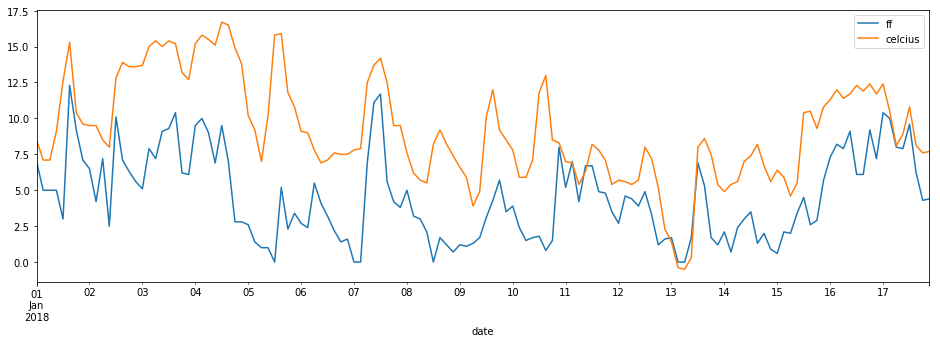

In [7]:
%matplotlib inline

vent_temp.plot(figsize=(16, 5));

Quelques valeurs remarquables

In [23]:
vent_temp.max()

ff         12.3
celcius    16.7
dtype: float64

In [20]:
vent_temp.min()

ff         0.0
celcius   -0.5
dtype: float64

In [21]:
vent_temp.mean()

ff         4.524265
celcius    9.184559
dtype: float64

## Exercice

Faites les mêmes manipulations pour le mois de décembre. Essayer d'étudier d'autres paramètres.